**Question 1 :** What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

**Answer:** Ensemble techniques combine multiple base learners to reduce error, improve stability and increase predictive performance by aggregating their outputs. Bagging (bootstrap aggregation) builds many independent models on random data samples and averages (or votes) predictions to reduce variance. Boosting builds learners sequentially, focusing on previous errors to reduce bias and create a strong learner.

**Question 2 :** Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

**Answer:** Random Forest reduces overfitting by creating many decorrelated trees and aggregating their predictions, lowering variance versus a single deep tree. Two key hyperparameters are `n_estimators` (number of trees — more trees stabilize predictions) and `max_features` (features considered per split — smaller values reduce correlation among trees).

**Question 3 :** What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

**Answer:** Stacking trains several base models (level-0) and then trains a meta-learner (level-1) on their predictions. Unlike bagging/boosting that aggregate directly, stacking learns how to combine outputs. Use case: combine logistic regression, random forest, and xgboost predictions with a simple linear model to improve credit-risk classification.

**Question 4 :** What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

**Answer:** Out-of-Bag (OOB) score uses samples not included in a tree's bootstrap sample as a validation set to estimate generalization error. Averaging OOB predictions across trees gives an internal cross-validation estimate, saving data (no separate validation set) and helping tune hyperparameters reliably for Random Forest.

**Question 5 :** Compare AdaBoost and Gradient Boosting in terms of: handling errors, weight adjustment mechanism, and typical use cases.

**Answer:** AdaBoost reweights training samples: misclassified examples receive higher weights so subsequent weak learners focus on them. Gradient Boosting fits each new learner to the residuals (gradient) of the loss function. AdaBoost is simple and works well with clean data; Gradient Boosting is more flexible (custom loss) and commonly used for structured predictive tasks.

**Question 6 :** Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

**Answer:** CatBoost uses ordered target statistics and permutation-driven encoding to transform categorical features while avoiding target leakage. It builds combinations of categorical features internally and uses boosting with specialized handling, reducing the need for manual one-hot encoding and often improving accuracy on datasets with many categorical variables.

In [2]:

# Question 7: KNN Classifier Assignment - Wine Dataset Analysis with Optimization
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

# 1) KNN default (k=5) without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred)
report_unscaled = classification_report(y_test, y_pred, target_names=data.target_names)

# 2) Scaling and retrain
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

knn_s = KNeighborsClassifier(n_neighbors=5)
knn_s.fit(X_train_s, y_train)
y_pred_s = knn_s.predict(X_test_s)
acc_scaled = accuracy_score(y_test, y_pred_s)
report_scaled = classification_report(y_test, y_pred_s, target_names=data.target_names)

# 3) GridSearchCV for best k and metric (use p for Minkowski: p=2 euclidean, p=1 manhattan)
param_grid = {'n_neighbors': list(range(1,21)), 'p': [1,2], 'weights': ['uniform']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_s, y_train)
best_params = grid.best_params_

# 4) Train optimized KNN
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_s)
acc_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best, target_names=data.target_names)

print('--- KNN Wine Dataset Results ---')
print(f'Accuracy (unscaled, k=5): {acc_unscaled:.4f}')
print(report_unscaled)
print(f'Accuracy (scaled, k=5): {acc_scaled:.4f}')
print(report_scaled)
print('Best params from GridSearch (on scaled data):', best_params)
print(f'Accuracy (optimized on scaled data): {acc_best:.4f}')
print(report_best)


--- KNN Wine Dataset Results ---
Accuracy (unscaled, k=5): 0.7222
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.78      0.67      0.72        21
     class_2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Accuracy (scaled, k=5): 0.9444
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best params from GridSearch (on scaled data): {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
Accuracy (optimized on scaled data): 0.9815
  

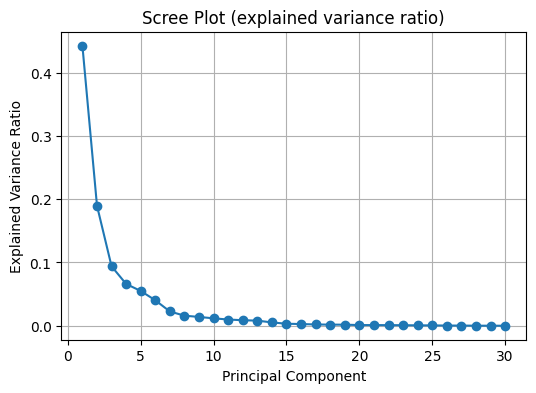

Accuracy (original scaled features): 0.9707602339181286
Accuracy (PCA-retained 95% variance): 0.9473684210526315
Number of PCA components retained for 95% variance: 10


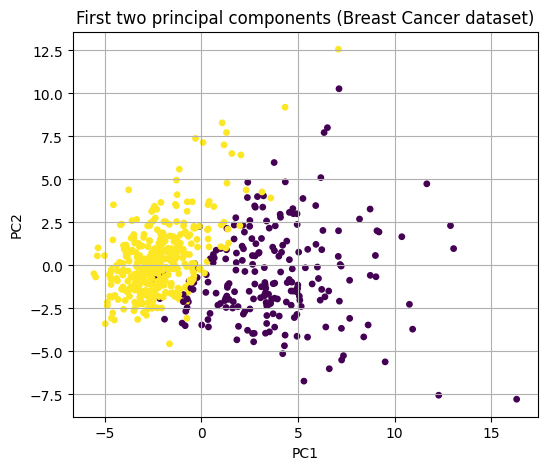

In [3]:

# Question 8: PCA + KNN with Variance Analysis and Visualization (Breast Cancer dataset)
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

# Scale data before PCA and KNN
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# PCA and scree plot
pca = PCA()
pca.fit(X_s)
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('Scree Plot (explained variance ratio)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Retain 95% variance and transform
pca95 = PCA(n_components=0.95)
X_pca95 = pca95.fit_transform(X_s)

# Train KNN on original scaled data and PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_s, y, train_size=0.7, random_state=42, stratify=y)
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
acc_orig = accuracy_score(y_test, knn_orig.predict(X_test))

# On PCA-transformed (fit_transform on full scaled X for simplicity, then split)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca95, y, train_size=0.7, random_state=42, stratify=y)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_p, y_train_p)
acc_pca = accuracy_score(y_test_p, knn_pca.predict(X_test_p))

print('Accuracy (original scaled features):', acc_orig)
print('Accuracy (PCA-retained 95% variance):', acc_pca)
print('Number of PCA components retained for 95% variance:', X_pca95.shape[1])

# Scatter plot of first two principal components (color by class)
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_s)
plt.figure(figsize=(6,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, s=15)
plt.title('First two principal components (Breast Cancer dataset)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


MSE (Euclidean, k=5): 4803.90558674207
MSE (Manhattan, k=5): 5210.225816542467


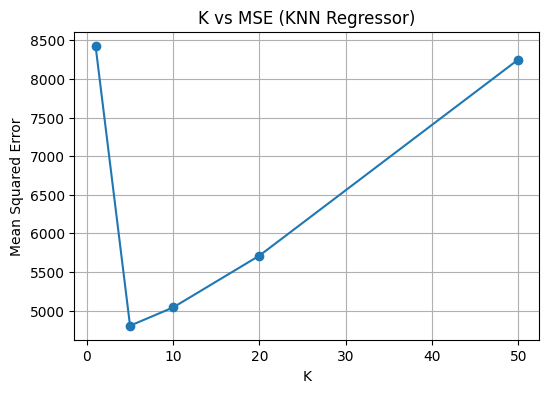

In [4]:

# Question 9: KNN Regressor with Distance Metrics and K-Value Analysis
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# K=5 Euclidean (p=2) and Manhattan (p=1)
knn_euc = KNeighborsRegressor(n_neighbors=5, p=2)
knn_euc.fit(X_train, y_train)
mse_euc = mean_squared_error(y_test, knn_euc.predict(X_test))

knn_man = KNeighborsRegressor(n_neighbors=5, p=1)
knn_man.fit(X_train, y_train)
mse_man = mean_squared_error(y_test, knn_man.predict(X_test))

print('MSE (Euclidean, k=5):', mse_euc)
print('MSE (Manhattan, k=5):', mse_man)

# Test K = [1,5,10,20,50] and plot K vs MSE
ks = [1,5,10,20,50]
mses = []
for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    mses.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(6,4))
plt.plot(ks, mses, marker='o')
plt.title('K vs MSE (KNN Regressor)')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


--- KNN algorithm comparison (Pima Diabetes) ---
Algorithm: brute | Train time: 0.0023s | Accuracy: 0.7056
Algorithm: kd_tree | Train time: 0.0029s | Accuracy: 0.7056
Algorithm: ball_tree | Train time: 0.0027s | Accuracy: 0.7056
Selected two important features for plotting: ['Glucose', 'Insulin']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


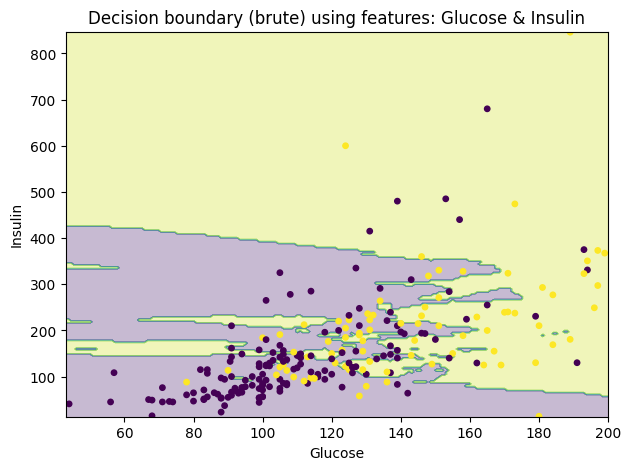

In [5]:

# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data (Pima Indians Diabetes)
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv'
try:
    df = pd.read_csv(url)
except Exception as e:
    df = pd.read_csv('/mnt/data/diabetes.csv')  # fallback if user uploads file locally

# Identify columns with zeros that indicate missingness in some Pima datasets (common columns)
cols_with_zero_missing = [c for c in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] if c in df.columns]
df[cols_with_zero_missing] = df[cols_with_zero_missing].replace(0, np.nan)

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Prepare features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

# Compare algorithms: brute, kd_tree, ball_tree using KNeighborsClassifier
results = {}
for algo in ['brute', 'kd_tree', 'ball_tree']:
    clf = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    t0 = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - t0
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = {'train_time': train_time, 'accuracy': acc}

print('--- KNN algorithm comparison (Pima Diabetes) ---')
for algo, res in results.items():
    print(f"Algorithm: {algo} | Train time: {res['train_time']:.4f}s | Accuracy: {res['accuracy']:.4f}")

# Feature importance (simple univariate) to pick 2 most important features for visualization
sel = SelectKBest(f_classif, k=2)
X_sel = sel.fit_transform(X_train, y_train)
selected_cols = X.columns[sel.get_support()].tolist()
print('Selected two important features for plotting:', selected_cols)

# Fit best-performing algorithm classifier for decision boundary visualization
best_algo = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_clf = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_clf.fit(X_train[selected_cols], y_train)

# Decision boundary for two features (plot)
xx_min, xx_max = X[selected_cols[0]].min() - 1, X[selected_cols[0]].max() + 1
yy_min, yy_max = X[selected_cols[1]].min() - 1, X[selected_cols[1]].max() + 1
xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 200), np.linspace(yy_min, yy_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = best_clf.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[selected_cols[0]], X_test[selected_cols[1]], c=y_test, s=15)
plt.title(f'Decision boundary ({best_algo}) using features: {selected_cols[0]} & {selected_cols[1]}')
plt.xlabel(selected_cols[0])
plt.ylabel(selected_cols[1])
plt.show()
